In [16]:
import torch
import torchvision
import torchviz
from torchsummary import summary
from models import ninab1
from utils.params import Params

In [6]:
params = Params("hparams.yaml", "DEFAULT")
model = ninab1.net(params)

In [38]:
i = 0
for mod in model.children():
    print(model)

net(
  (model): NinaSR(
    (head): Sequential(
      (0): Rescale()
      (1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
    (body): Sequential(
      (0): ResBlock(
        (body): Sequential(
          (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): ReLU(inplace=True)
          (2): AttentionBlock(
            (body): Sequential(
              (0): AvgPool2d(kernel_size=31, stride=16, padding=15)
              (1): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))
              (2): ReLU(inplace=True)
              (3): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
              (4): Sigmoid()
              (5): Upsample(scale_factor=16.0, mode='nearest')
            )
          )
          (3): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
      )
      (1): ResBlock(
        (body): Sequential(
          (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1),

In [20]:
summary(model, (3, 200, 200))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Rescale-1          [-1, 3, 200, 200]               3
            Conv2d-2         [-1, 32, 200, 200]             864
            Conv2d-3         [-1, 64, 200, 200]          18,496
              ReLU-4         [-1, 64, 200, 200]               0
         AvgPool2d-5           [-1, 64, 13, 13]               0
            Conv2d-6           [-1, 16, 13, 13]           1,040
              ReLU-7           [-1, 16, 13, 13]               0
            Conv2d-8           [-1, 64, 13, 13]           1,088
           Sigmoid-9           [-1, 64, 13, 13]               0
         Upsample-10         [-1, 64, 208, 208]               0
   AttentionBlock-11         [-1, 64, 200, 200]               0
           Conv2d-12         [-1, 32, 200, 200]          18,432
         ResBlock-13         [-1, 32, 200, 200]               0
           Conv2d-14         [-1, 64, 2

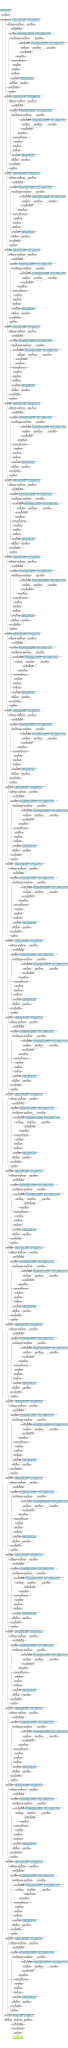

In [14]:
torchviz.make_dot(model(torch.ones((1, 3, 200, 200))), params=dict(list(model.named_parameters())))